In [1]:
import seaborn as sns
from matplotlib import cm
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [2]:
help(pd.read_csv)
help(pd.read_excel)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool' = False, date_parser=<no_default>, date_format: 'str

In [3]:
# Load the dataset
data = pd.read_csv("data/NFL.csv", sep=",")
data.head(5)
list(data.columns)

['Age',
 'Birth Place',
 'Birthday',
 'College',
 'Current Status',
 'Current Team',
 'Experience',
 'Height (inches)',
 'High School',
 'High School Location',
 'Name',
 'Number',
 'Player Id',
 'Position',
 'Weight (lbs)',
 'Years Played']

In [4]:
# Filtering and Selecting
ageFilterValue = 20
ageFilter = (data["Age"] > ageFilterValue) & (data["Current Status"] == "Active")
aboveAge = data[ageFilter]
len(aboveAge)
aboveAge.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN
7,22.0,"Navarre , FL",1/31/1995,Clemson,Active,New York Jets,Rookie,77.0,Navarre HS,FL,"Leggett, Jordan",NaN,jordanleggett/2557885,TE,250.0,NaN
17,25.0,NaN,3/11/1992,Pittsburgh,Active,Washington Redskins,1st season,74.0,NaN,NaN,"Garner, Manasseh",NaN,manassehgarner/2553801,TE,220.0,NaN
35,29.0,"Dayton , OH",4/1/1988,Ohio State,Active,Carolina Panthers,8th season,71.0,Northmont HS,"Clayton, OH","Coleman, Kurt",20.0,kurtcoleman/494261,SS,200.0,NaN
37,26.0,"Rodeo , CA",7/28/1990,Ohio U.,Active,Oakland Raiders,4th season,72.0,De La Salle HS,"Concord, CA","Carrie, T.J.",38.0,t.j.carrie/2550164,SS,205.0,NaN


In [5]:
type(list(data["Current Status"].unique())[0])
activeFilter = data["Current Status"] == "Active"

aboveAndActive = data[ageFilter & activeFilter]
len(aboveAndActive)

2731

<Axes: title={'center': 'Active players above  20 grouped by position'}, xlabel='Position'>

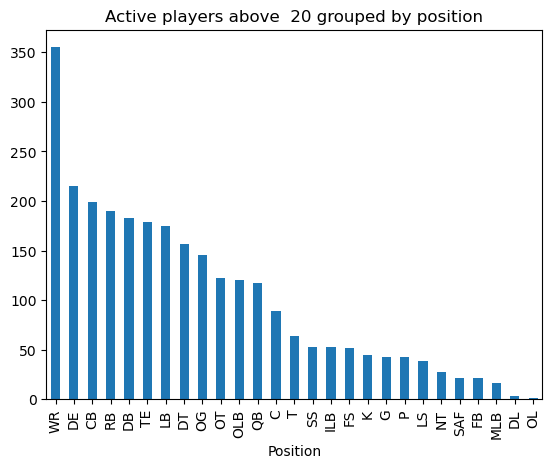

In [8]:
# Plotting
frequencies = aboveAndActive["Position"].value_counts()
frequencies.plot.bar(
    title=(
        f"Active players above  {ageFilterValue} grouped by position"
    )
)


In [10]:
# Plotting with style
color = cm.inferno_r(np.linspace(.4, .8, 30))
frequencies.plot(
    kind="bar",
    title=(
        f"Active NFL players above {ageFilterValue} grouped by position"
    ),
    color=color
)
plt.savefig('./images/nflBar.png', dpi=500)
plt.close()